In [1]:
from lrgsglib.core import *
move_to_rootf()
#
izaro_mat_path = Path('data') / 'real_data' / 'brain' / '2165.mat'
giampiero_mat_path = Path('data') / 'real_data' / 'brain' / 'Pat_02'
#
plt.rcParams.update({'font.size': 24})  # Adjust the font size to your preference


Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


### Giampiero Matrix

In [2]:
channel_names = loadmat(giampiero_mat_path / 'ChannelNames.mat')
channel_names_list = [name[0] for name in channel_names["ChannelNames"][0]]
node_mapping = {i: channel_names_list[i] for i in range(len(channel_names_list))}
#
pre_task = loadmat(giampiero_mat_path / 'RestingPreTask_Correlation_matrix.mat')
pre_th = loadmat(giampiero_mat_path / 'RestingPreTask_Percolation_output.mat')
mcorr_pre_th = pre_th['Thresholded_Matrix'].copy()
np.fill_diagonal(mcorr_pre_th, 0)
PreTaskGraphTh = nx.from_numpy_array(mcorr_pre_th)
PreTaskGraphTh = nx.relabel_nodes(PreTaskGraphTh, node_mapping)
PreTaskThEntropy = entropy(PreTaskGraphTh)
#
post_task = loadmat(giampiero_mat_path / 'RestingPostTask_Correlation_matrix.mat')
post_th = loadmat(giampiero_mat_path / 'RestingPostTask_Percolation_output.mat')
mcorr_post_th = post_th['Thresholded_Matrix'].copy()
np.fill_diagonal(mcorr_post_th, 0)
PostTaskGraphTh = nx.from_numpy_array(mcorr_post_th)
PostTaskGraphTh = nx.relabel_nodes(PostTaskGraphTh, node_mapping)
PostTaskThEntropy = entropy(PostTaskGraphTh)
#

/home/opisthofulax/PhD/projects/complex-networks/lrgsglib/src/lrgsglib/core.py:645: RuntimeWarning: divide by zero encountered in log
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)
/home/opisthofulax/PhD/projects/complex-networks/lrgsglib/src/lrgsglib/core.py:645: RuntimeWarning: invalid value encountered in multiply
  S[i] = -np.nansum(rho * np.log(rho)) / np.log(N)


In [35]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections
import pandas as pd
import scipy.stats as stats

def analyze_network(G):
    # Basic Properties
    num_nodes = G.number_of_nodes()
    num_edges = G.number_of_edges()
    avg_degree = sum(dict(G.degree()).values()) / num_nodes if num_nodes > 0 else 0
    density = nx.density(G)
    is_directed = nx.is_directed(G)

    # Connectivity
    if nx.is_directed(G):
        is_strongly_connected = nx.is_strongly_connected(G)
        is_weakly_connected = nx.is_weakly_connected(G)
        num_strong_components = nx.number_strongly_connected_components(G)
        num_weak_components = nx.number_weakly_connected_components(G)
    else:
        is_connected = nx.is_connected(G)
        num_components = nx.number_connected_components(G)

    # Degree Distribution
    degree_sequence = [d for n, d in G.degree()]
    degree_counts = collections.Counter(degree_sequence)
    deg, count = zip(*degree_counts.items())

    # Clustering Coefficient
    avg_clustering = nx.average_clustering(G)
    global_clustering = nx.transitivity(G)

    # Shortest Paths and Diameter
    if nx.is_connected(G) if not is_directed else is_weakly_connected:
        diameter = nx.diameter(G)
        avg_shortest_path_length = nx.average_shortest_path_length(G)
    else:
        diameter = None
        avg_shortest_path_length = None

    # Assortativity
    assortativity = nx.degree_assortativity_coefficient(G)

    # Centralities
    degree_centrality = nx.degree_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)

    # Small-world Coefficient (sigma)
    if is_connected:
        rand_graph = nx.gnm_random_graph(num_nodes, num_edges)
        avg_clustering_rand = nx.average_clustering(rand_graph)
        avg_shortest_path_rand = nx.average_shortest_path_length(rand_graph)
        sigma = (avg_clustering / avg_clustering_rand) / (avg_shortest_path_length / avg_shortest_path_rand)
    else:
        sigma = None

    # Structural Holes (Bridges)
    bridges = list(nx.bridges(G)) if not is_directed else None

    # Summary Statistics
    summary = {
        "Number of Nodes": num_nodes,
        "Number of Edges": num_edges,
        "Average Degree": avg_degree,
        "Density": density,
        "Is Directed": is_directed,
        "Is Connected": is_connected if not is_directed else None,
        "Is Strongly Connected": is_strongly_connected if is_directed else None,
        "Is Weakly Connected": is_weakly_connected if is_directed else None,
        "Number of Components": num_components if not is_directed else num_weak_components,
        "Diameter": diameter,
        "Average Shortest Path Length": avg_shortest_path_length,
        "Average Clustering Coefficient": avg_clustering,
        "Global Clustering Coefficient": global_clustering,
        "Assortativity": assortativity,
        "Small-World Sigma": sigma,
        "Bridges Count": len(bridges) if bridges is not None else None
    }

    df_summary = pd.DataFrame(summary.items(), columns=["Metric", "Value"])
    # Degree Distribution Plot
    # plt.figure(figsize=(8, 6))
    # plt.bar(deg, count, width=0.8, color='b', alpha=0.7)
    # plt.xlabel("Degree")
    # plt.ylabel("Frequency")
    # plt.title("Degree Distribution")
    # # plt.yscale("log")
    # # plt.xscale("log")
    # plt.show()

    # Centrality Distribution
    centrality_measures = {
        "Degree Centrality": degree_centrality,
        "Closeness Centrality": closeness_centrality,
        "Betweenness Centrality": betweenness_centrality,
        "Eigenvector Centrality": eigenvector_centrality
    }
    
    # for name, centrality in centrality_measures.items():
    #     plt.figure(figsize=(8, 6))
    #     plt.hist(centrality.values(), bins=30, alpha=0.7, color='r')
    #     plt.xlabel("Centrality")
    #     plt.ylabel("Frequency")
    #     plt.title(f"{name} Distribution")
    #     plt.show()
    
    return df_summary

# Example Usage:
# G = nx.erdos_renyi_graph(100, 0.05)  # Replace with your graph
# analyze_network(G)


### Pre

In [52]:
tau=None

In [53]:
spectrum, L, rho, Trho, tau = compute_properties(PreTaskGraphTh, tau=tau)
dists = squareform(Trho)
linkage_matrix, label_list, tmax = compute_normalized_linkage(dists, PreTaskGraphTh, method='ward')
FlatClusteringTh , *_ = compute_optimal_threshold(linkage_matrix)

In [54]:
FlatClusteringTh =1e-9
optimal_clusters = fcluster(linkage_matrix, t=FlatClusteringTh, criterion='distance')

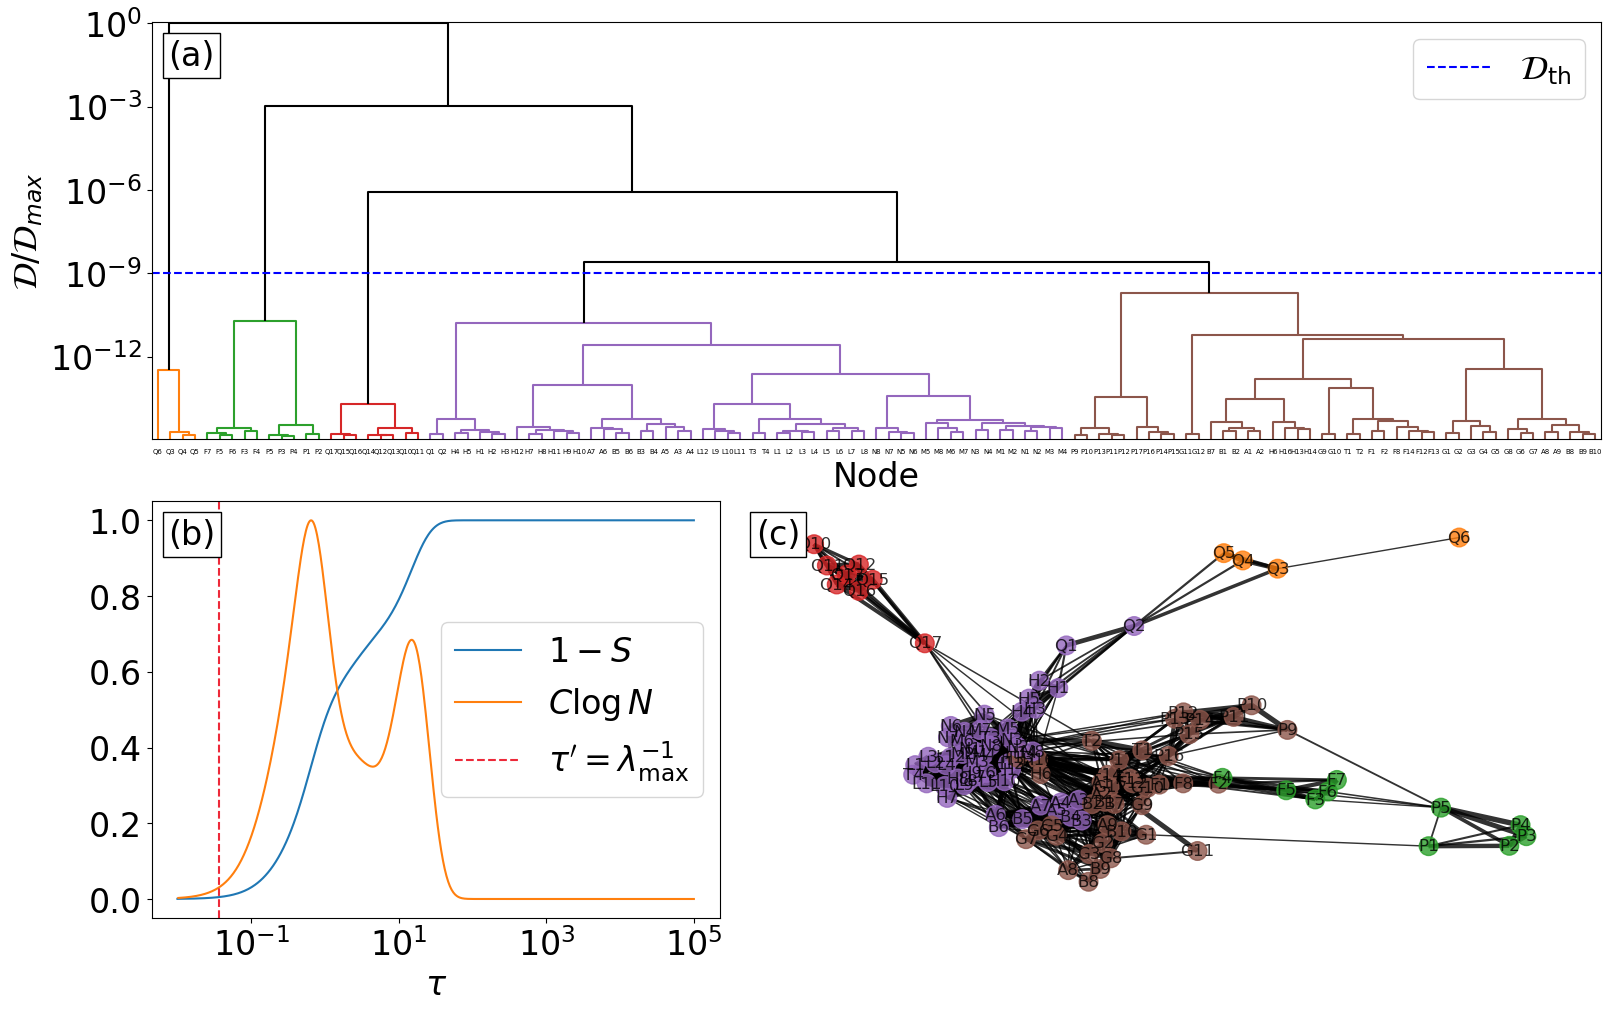

In [55]:
fig = plt.figure(constrained_layout=True,figsize=(16,10))
#
ax_dict = fig.subplot_mosaic(
    """
    AAAAA
    AAAAA
    BBCCC
    BBCCC
    """
)
label_map = {'A': r'(a)', 'B': r'(b)', 'C': r'(c)'}
#
dendro = dendrogram(
    linkage_matrix, 
    ax=ax_dict['A'],
    color_threshold=FlatClusteringTh,
    above_threshold_color='k',
    labels=label_list,
    leaf_rotation=0,
    leaf_font_size=5,
)
#
tmin = linkage_matrix[::, 2][0] - 0.2*linkage_matrix[::, 2][0]
tmax = linkage_matrix[::, 2][-1] + 0.1*linkage_matrix[::, 2][-1]
#
ax_dict['A'].axhline(
    y = FlatClusteringTh, 
    color = 'b', 
    linestyle = '--', 
    label=r"$\mathcal{D}_{\rm th}$")
ax_dict['A'].set_yscale('log')
ax_dict['A'].set_ylim(tmin,tmax)
ax_dict['A'].legend()
ax_dict['A'].set_ylabel(r"$\mathcal{D}/\mathcal{D}_{max}$")
ax_dict['A'].set_xlabel('Node')
#
tau_scale = PreTaskThEntropy[-1]
Sm1 = PreTaskThEntropy[0]/PreTaskThEntropy[0].max()
C = PreTaskThEntropy[1]/PreTaskThEntropy[1].max()
#
ax_dict['B'].plot(tau_scale, Sm1, label=r'$1-S$')
ax_dict['B'].plot(tau_scale[1:], C, label=r'$C\log N$')
#
ax_dict['B'].set_xscale('log')
ax_dict['B'].set_xlabel(r'$\tau$')
ax_dict['B'].axvline(x = tau, color = '#ED2939', linestyle = '--', label=r"$\tau' = \lambda_{\max}^{-1}$")
ax_dict['B'].legend()

# ims = ax_dict['D'].imshow(rho)
# axD_divider = make_axes_locatable(ax_dict['D'])
# Add an Axes to the right of the main Axes.
# caxD = axD_divider.append_axes("right", size="7%", pad="2%")
# fig.colorbar(ims, cax=caxD, orientation='vertical')

pos = nx.spring_layout(PreTaskGraphTh, seed=2)
leaf_label_colors = {label: color for label, color in zip(dendro['ivl'], dendro['leaves_color_list'])}
node_colors = [leaf_label_colors[label] for label in label_list]
edge_weights = np.array([PreTaskGraphTh[u][v].get("weight", 1.0) for u, v in PreTaskGraphTh.edges()])
edge_widths = 1 + 3 * (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min() + 1e-6)

nx.draw(PreTaskGraphTh, pos, ax=ax_dict['C'], node_color=node_colors, 
        with_labels=True, edge_color="k", alpha=0.8, 
        node_size=180, width=edge_widths)
# ax_dict['C'].set_aspect('equal')

for label, ax in ax_dict.items():
    ax.annotate(
        label_map[label],
        xy=(0, 1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='1', edgecolor='black', pad=4.0))

fig.savefig(PATHPLOT / 'brain_pre_giampiero.pdf')

In [56]:
plt.close('all')

### Post

In [57]:
tau=None
spectrum, L, rho, Trho, tau = compute_properties(PostTaskGraphTh, tau=tau)
dists = squareform(Trho)
linkage_matrix, label_list, tmax = compute_normalized_linkage(dists, PostTaskGraphTh, method='ward')
FlatClusteringTh , *_ = compute_optimal_threshold(linkage_matrix, scaling_factor=1.1)

In [58]:
FlatClusteringTh = 5e-9
optimal_clusters = fcluster(linkage_matrix, t=FlatClusteringTh, criterion='distance')

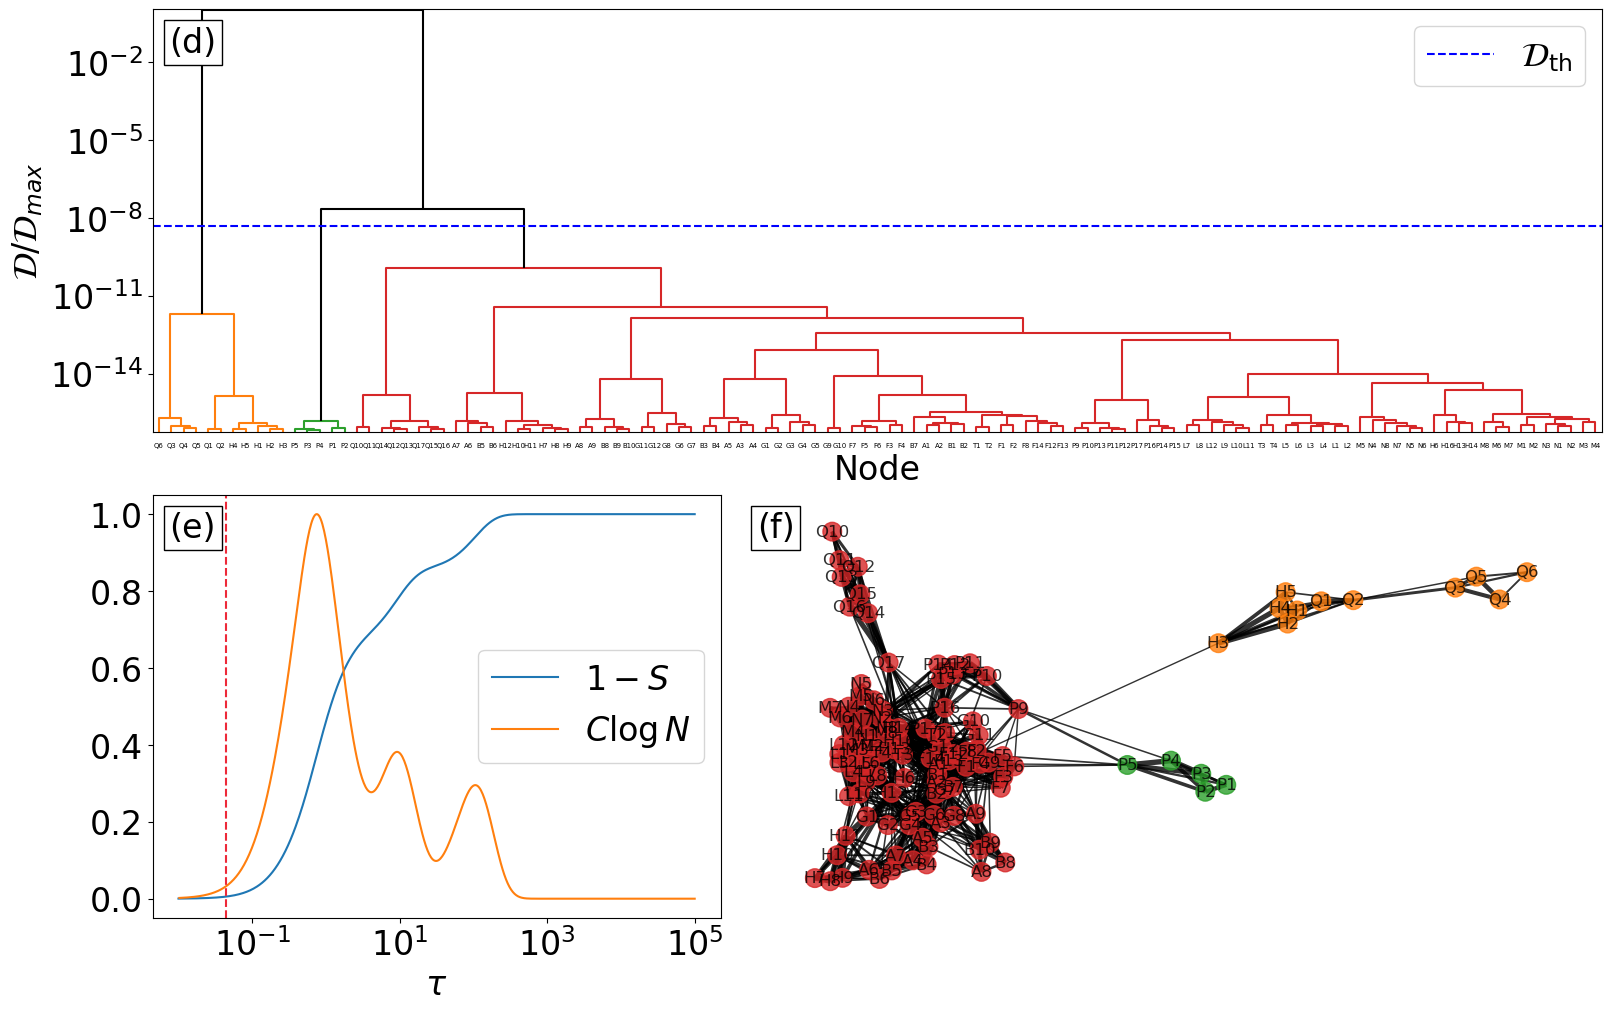

In [59]:
fig = plt.figure(constrained_layout=True,figsize=(16,10))
#

ax_dict = fig.subplot_mosaic(
    """
    AAAAA
    AAAAA
    BBCCC
    BBCCC
    """
)
label_map = {'A': r'(d)', 'B': r'(e)', 'C': r'(f)'}
#
dendro = dendrogram(
    linkage_matrix, 
    ax=ax_dict['A'],
    color_threshold=FlatClusteringTh,
    above_threshold_color='k',
    labels=label_list,
    leaf_rotation=0,
    leaf_font_size=5,
)
#
tmin = linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax = linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]
#
ax_dict['A'].axhline(y = FlatClusteringTh, color = 'b', linestyle = '--',label=r"$\mathcal{D}_{\rm th}$")
ax_dict['A'].set_yscale('log')
ax_dict['A'].set_ylim(tmin,tmax)
ax_dict['A'].legend()
ax_dict['A'].set_ylabel(r"$\mathcal{D}/\mathcal{D}_{max}$")
ax_dict['A'].set_xlabel('Node')
#
tau_scale = PostTaskThEntropy[-1]
Sm1 = PostTaskThEntropy[0]/PostTaskThEntropy[0].max()
C = PostTaskThEntropy[1]/PostTaskThEntropy[1].max()
#
ax_dict['B'].plot(tau_scale, Sm1, label=r'$1-S$')
ax_dict['B'].plot(tau_scale[1:], C, label=r'$C\log N$')
#
ax_dict['B'].set_xscale('log')
ax_dict['B'].set_xlabel(r'$\tau$')
ax_dict['B'].axvline(x = tau, color = '#ED2939', linestyle = '--')
ax_dict['B'].legend()

# ims = ax_dict['D'].imshow(rho)
# axD_divider = make_axes_locatable(ax_dict['D'])
# Add an Axes to the right of the main Axes.
# caxD = axD_divider.append_axes("right", size="7%", pad="2%")
# fig.colorbar(ims, cax=caxD, orientation='vertical')

pos = nx.spring_layout(PostTaskGraphTh, seed=2)
leaf_label_colors = {label: color for label, color in zip(dendro['ivl'], dendro['leaves_color_list'])}
node_colors = [leaf_label_colors[label] for label in label_list]
edge_weights = np.array([PostTaskGraphTh[u][v].get("weight", 1.0) for u, v in PostTaskGraphTh.edges()])
edge_widths = 1 + 3 * (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min() + 1e-6)

nx.draw(PostTaskGraphTh, pos, ax=ax_dict['C'], node_color=node_colors, 
        with_labels=True, edge_color="k", alpha=0.8, 
        node_size=180, width=edge_widths)
# ax_dict['C'].set_aspect('equal')

for label, ax in ax_dict.items():
    ax.annotate(
        label_map[label],
        xy=(0, 1), xycoords='axes fraction',
        xytext=(+0.5, -0.5), textcoords='offset fontsize',
        fontsize='medium', verticalalignment='top',
        bbox=dict(facecolor='1', edgecolor='black', pad=4.0))
# ax_dict['C'].set_aspect('equal')
fig.savefig(PATHPLOT / 'brain_post_giampiero.pdf')


### Izaro Matrix

In [ ]:
# Load the MAT-file
data = loadmat(izaro_mat_path)
# Display keys in the MAT file
print(data.keys())

In [ ]:
PostTaskGraphTh = nx.from_numpy_array(data['final_prob_connectome_cone'])
largest_cc = max(nx.connected_components(PostTaskGraphTh), key=len)
PostTaskGraphTh = PostTaskGraphTh.subgraph(largest_cc).copy()
PostTaskGraphTh.number_of_nodes(), PostTaskGraphTh.number_of_edges()
nx.draw(PostTaskGraphTh, node_size=1)

In [ ]:
PreTaskThEntropy = entropy(PostTaskGraphTh, steps=2000)

In [ ]:
FlatClusteringTh= 0.05
w=1/nx.laplacian_spectrum(PostTaskGraphTh)
tau=100
L=nx.laplacian_matrix(PostTaskGraphTh)
L1=L.todense()
num=expm((-tau*L1))
den=np.trace(num)
rho=num/den
Trho=np.copy(1.0/rho)#1/adj2
Trho = np.maximum(Trho, Trho.transpose() )
np.fill_diagonal(Trho, 0)
dists = squareform(Trho)
linkage_matrix = linkage(dists, "average")
label_list = [i+1 for i in range(0, len(PostTaskGraphTh.nodes()))]
tmax=linkage_matrix[::, 2][-1]#+0.01*linkage_matrix[::, 2][-1]
linkage_matrix = linkage(dists/tmax, "average")
optimal_clusters=fcluster(linkage_matrix, t=FlatClusteringTh, criterion='distance')
# Define the number of clusters
num_clusters = len(np.unique(optimal_clusters))
# Generate a distinct colormap
cmap = plt.cm.get_cmap('tab10', num_clusters)  # 'tab10' ensures distinct colors
cmap1 = cmap(np.linspace(0, 1, num_clusters))  # Get unique colors
# Map clusters to colors
cluster_to_color = {cluster: cmap1[i] for i, cluster in enumerate(np.unique(optimal_clusters))}

In [ ]:
pos = nx.spectral_layout(PostTaskGraphTh)  # Use spectral embedding for node positions

# Assign colors to nodes based on module clustering
node_colors = [cluster_to_color[optimal_clusters[i]] for i in range(len(PostTaskGraphTh.nodes))]
edge_weights = np.array([PostTaskGraphTh[u][v].get("weight", 1.0) for u, v in PostTaskGraphTh.edges()])
edge_widths = 1 + 4 * (edge_weights - edge_weights.min()) / (edge_weights.max() - edge_weights.min() + 1e-6)  # Normalize for better visibility

In [ ]:
fig = plt.figure(constrained_layout=True,figsize=(8,6))
ax_dict = fig.subplot_mosaic(
    """
    ABBB
    CCDD
    """
)
#fig, ax = plt.subplots(1, 1, figsize=(4, 6))
dendrogram(linkage_matrix,labels=label_list,ax=ax_dict['A'],leaf_rotation=0,
           orientation='right',color_threshold=FlatClusteringTh,above_threshold_color='k',
           leaf_font_size=10)

#cmap1[0]=[46/255., 159/255., 223/255., 1.]
hierarchy.set_link_color_palette([rgb2hex(rgb[:3]) for rgb in cmap1])
cont=0
ax_dict['A'].axvline(x = FlatClusteringTh, color = '#ED2939', linestyle = '--')
ax_dict['A'].set_xscale('linear')
tmin=linkage_matrix[::, 2][0]-0.2*linkage_matrix[::, 2][0]
tmax=linkage_matrix[::, 2][-1]+0.1*linkage_matrix[::, 2][-1]
ax_dict['A'].set_xlim(tmin,tmax)
ax_dict['A'].set_xlabel(r'$\mathcal{D}/\mathcal{D}_{max}$')
ax_dict['A'].set_ylabel('Node index')
ax_dict['A'].set_xscale('log')
ax_dict['A'].set_xticks([1e-4,1e-2,1e0])

ax_dict['B'].plot(PreTaskThEntropy[-1], PreTaskThEntropy[0]/PreTaskThEntropy[0].max())
ax_dict['B'].plot(PreTaskThEntropy[-1][1:], PreTaskThEntropy[1]/PreTaskThEntropy[1].max())

ax_dict['B'].set_xscale('log')
ax_dict['B'].set_xlabel(r'$\tau$')
ax_dict['B'].set_ylabel(r'$1-S$')
ax_dict['B'].axvline(x = tau, color = '#ED2939', linestyle = '--')

ax_dict['D'].imshow(-np.log(rho))
nx.draw(PostTaskGraphTh, pos, ax=ax_dict['C'], node_color=node_colors, with_labels=False, edge_color="gray", alpha=0.7, node_size=20, width=edge_widths)


fig.savefig(PATHPLOT / 'brain.pdf')